In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd
from statistics import mean
from scipy import signal, ndimage
from scipy import asarray as ar,exp

from scipy.optimize import curve_fit
import matplotlib.patches as ptc
from numpy.polynomial import Polynomial
from astropy.io import fits
import scienceplots
plt.style.use(['science','notebook','grid'])

from scipy.stats import sem

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split


def f(x):
    """The function to predict."""
    return x * np.sin(x)


rng = np.random.RandomState(42)
X = np.atleast_2d(rng.uniform(0, 10.0, size=1000)).T
expected_y = f(X).ravel()

In [3]:
sigma = 0.5 + X.ravel() / 10
noise = rng.lognormal(sigma=sigma) - np.exp(sigma**2 / 2)
y = expected_y + noise

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_pinball_loss, mean_squared_error

all_models = {}
common_params = dict(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=2,
    min_samples_leaf=9,
    min_samples_split=9,
)
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X_train, y_train)

In [6]:
gbr_ls = GradientBoostingRegressor(loss="squared_error", **common_params)
all_models["mse"] = gbr_ls.fit(X_train, y_train)

In [7]:
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T

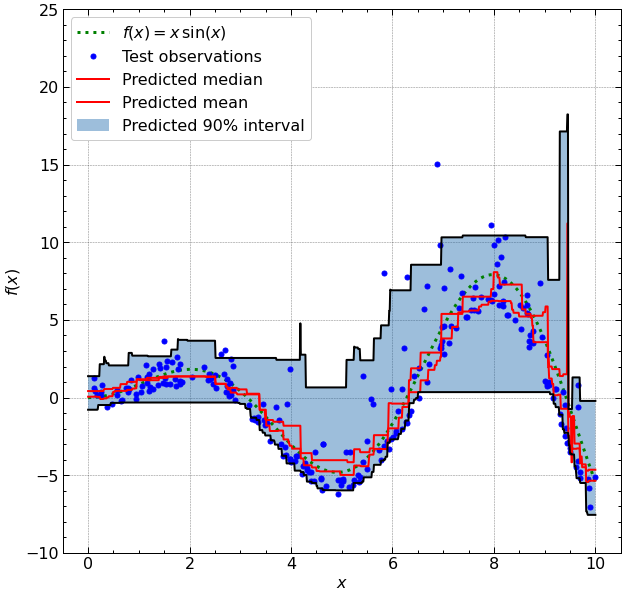

In [8]:
import matplotlib.pyplot as plt

y_pred = all_models["mse"].predict(xx)
y_lower = all_models["q 0.05"].predict(xx)
y_upper = all_models["q 0.95"].predict(xx)
y_med = all_models["q 0.50"].predict(xx)

fig = plt.figure(figsize=(10, 10))
plt.plot(xx, f(xx), "g:", linewidth=3, label=r"$f(x) = x\,\sin(x)$")
plt.plot(X_test, y_test, "b.", markersize=10, label="Test observations")
plt.plot(xx, y_med, "r-", label="Predicted median")
plt.plot(xx, y_pred, "r-", label="Predicted mean")
plt.plot(xx, y_upper, "k-")
plt.plot(xx, y_lower, "k-")
plt.fill_between(
    xx.ravel(), y_lower, y_upper, alpha=0.4, label="Predicted 90% interval"
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 25)
plt.legend(loc="upper left")
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Add a constant (intercept) term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Calculate the confidence intervals for the coefficients
confidence_intervals = model.conf_int()

# Print the results
print("Coefficients:")
print(model.params)
print("\nConfidence Intervals:")
print(confidence_intervals)


In [10]:
from scipy.stats import chi2
from scipy.stats import gamma

In [6]:
phi = 2
###values of chi-squared
chi_val_95 = chi2.isf(q=0.05/2, df=phi) #/2 for two-sided test

### normalization of power spectrum with 1/n
plt.figure(figsize=(5,5))
plt.plot(xf,np.abs(yf)**2/n, color='k')
# the following two lines should overlap
plt.axhline(y=var*(chi_val_95/phi),color='r',linestyle='--')
plt.axhline(y=gamma.isf(q=0.05/2, a=1, scale=var),color='b')

NameError: name 'xf' is not defined

<Figure size 360x360 with 0 Axes>

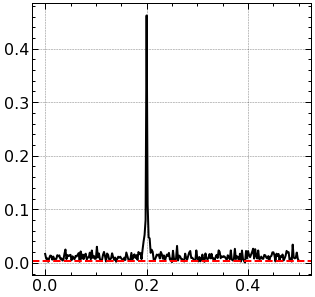

In [7]:
import numpy as np
from scipy.stats import chi2
from scipy.fft import rfft, rfftfreq

x=np.linspace(0,10,500)

data = np.sin(20*np.pi*x)+np.random.rand(500) - 0.5

yf = rfft(data)
xf = rfftfreq(len(data), 1) 
n=len(data)

var=np.var(data)

### degrees of freedom
M=n/2
phi=(2*(n-1)-M/2.)/M       
###values of chi-squared
chi_val_99 = chi2.isf(q=0.01/2, df=phi) #/2 for two-sided test
chi_val_95 = chi2.isf(q=0.05/2, df=phi)



### normalization of power spectrum with 1/n
plt.figure(figsize=(5,5))
plt.plot(xf,np.abs(yf)/n, color='k')  
plt.axhline(y=(var/n)*(chi_val_95/phi),color='r',linestyle='--') 

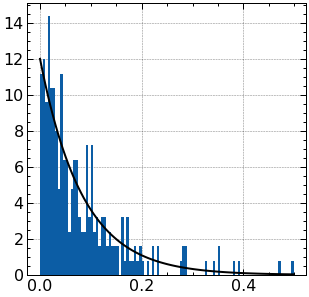

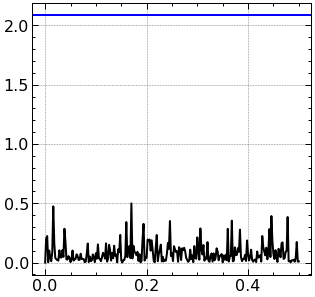

In [11]:
# degrees of freedom
data = np.sqrt(1.0/12)*np.random.randn(500)
yf = rfft(data)
spectrum = np.abs(yf)**2/len(data)
plt.figure(figsize=(5,5))
plt.hist(spectrum, bins=100, density=True, label='data')
z = np.linspace(0, np.max(spectrum), 100)
plt.plot(z, gamma.pdf(z, 1, scale=1.0/12), 'k', label='$\Gamma(1,{:.3f})$'.format(1.0/12))
# degrees of freedom
phi = 2
###values of chi-squared
chi_val_95 = chi2.isf(q=0.05/2, df=phi) #/2 for two-sided test

### normalization of power spectrum with 1/n
plt.figure(figsize=(5,5))
plt.plot(xf,np.abs(yf)**2/n, color='k')
# the following two lines should overlap
plt.axhline(y=var*(chi_val_95/phi),color='r',linestyle='--')
plt.axhline(y=gamma.isf(q=0.05/2, a=1, scale=var),color='b')

In [12]:
# remove outliers
threshold = np.percentile(np.abs(yf)**2, 95) 
filtered = [x for x in np.abs(yf)**2 if x <= threshold]

In [13]:
var = np.mean(filtered)/len(data)

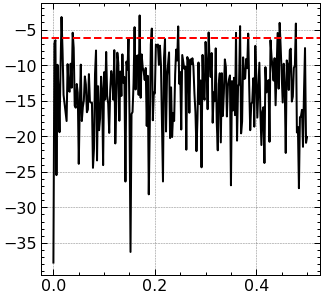

In [14]:
plt.figure(figsize=(5,5))
plt.plot(xf,10*np.log10(np.abs(yf)**2/n), color='k')  
plt.axhline(y=10*np.log10(gamma.isf(q=0.05/2, a=1, scale=var)),color='r',linestyle='--')

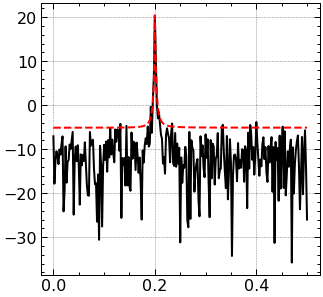

In [15]:
signal = np.sin(20*np.pi*x)
data = signal + np.random.rand(500) - 0.5
Sf   = rfft(signal)  # Assuming perfect knowledge of the sinusoidal component
yf   = rfft(data)

noiseVar = 1.0/12    # Assuming perfect knowledge of the noise variance
threshold95 = np.abs(Sf)**2/n + gamma.isf(q=0.05/2, a=1, scale=noiseVar)
plt.figure(figsize=(5,5))
plt.plot(xf, 10*np.log10(np.abs(yf)**2/n), color='k')  
plt.plot(xf, 10*np.log10(threshold95), color='r',linestyle='--')